In [1]:
%load_ext autoreload
%autoreload 2

## Self Attention
Implementation wise, this *is* Multihead. With $q$, $k$, $v$ being the same input.

Complexity wise, this is $O(n^2)$, where $n$ is the sequence length when using Dot Product Attention.

## Positional Encoding
With Self Attention we don't process the sequence *sequentially*. This piece of information is encoded seperately - which allows parallel processing.

Given input $\mathbf{X} \in \mathbb{R}^{n \times d}$ we can add positional encoding $\mathbf{P}$ of the same realm to it. In Vaswani et al. (2017) they use the following:
$$
\begin{aligned}
\text{P}_{(pos, 2i)} &= \sin\left(\frac{pos}{10000^{2i/d}}\right) \\
\text{P}_{(pos, 2i+1)} &= \cos\left(\frac{pos}{10000^{2i/d}}\right)
\end{aligned}
$$

aka Sinusoidal Positional Encoding. (You *REALLY* should) Read more about it here:
- https://kexue.fm/archives/8231
- https://www.itfaba.com/jishufenxian/205238.html


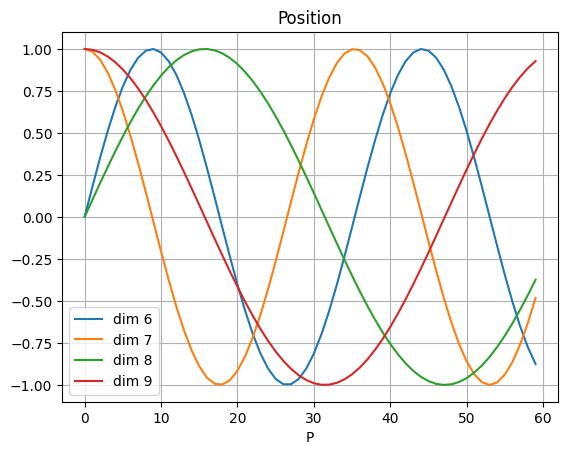

In [17]:
from naml.modules import torch, nn
from naml.modules.encoding import SinusoidalPositionalEncoding
from naml import plot
embed_size, num_steps = 32, 60
encoder = SinusoidalPositionalEncoding(embed_size, num_steps, 0.0)
encoder.eval()
X = torch.zeros((1, num_steps, embed_size))
encoder.forward(X)
P = encoder.P[:, :X.shape[1], :]

plot.xy(torch.arange(num_steps), P[0, :, 6:10], 'Position', 'P', legend=['dim %d'%p for p in [6, 7, 8, 9]])

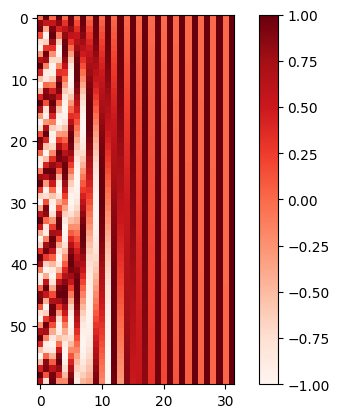

In [21]:
from naml import plot
plot.heatmap(P[0])